In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3

In [2]:
# Import data
con = sqlite3.connect('../HouseInfo.db')
df = pd.read_sql_query('Select * from Deal', con)
df.head()

,City,HouseName,Lng,Lat,tradeTime,DOM,followers,totalPrice,price,square,...,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,elevator,subway,district
0,Beijing,,116.475489,40.01952,2016,1464,106,4150000.0,31680.0,131.00,...,1,1,High,Tower,2005,Simplicity,Steel/Concrete,Yes,Yes,7
1,Beijing,,116.45391699999999,39.881534,2016,903,126,5750000.0,43436.0,132.38,...,1,2,High,Tower,2004,HardCover,Steel/Concrete,Yes,No,7
2,Beijing,,116.561978,39.877145,2016,1271,48,10300000.0,52021.0,198.00,...,1,3,Middle,Plate,2005,Simplicity,Steel/Concrete,Yes,No,7
3,Beijing,,116.43801,40.076114000000004,2016,965,138,2970000.0,22202.0,134.00,...,1,1,Low,Tower,2008,Other,Steel/Concrete,Yes,No,6
4,Beijing,,116.42839199999999,39.886229,2016,927,286,3920000.0,48396.0,81.00,...,1,1,Middle,Plate,1960,Rough,Mixed,No,Yes,1


In [3]:
df = df.drop(['price', 'square', 'HouseName','Lng', 'Lat', 'constructionTime','DOM','followers','tradeTime','subway'],axis=1)
df.head()

,City,totalPrice,bedRoom,livingRoom,kitchen,bathRoom,floor,buildingType,renovationCondition,buildingStructure,elevator,district
0,Beijing,4150000.0,2,1,1,1,High,Tower,Simplicity,Steel/Concrete,Yes,7
1,Beijing,5750000.0,2,2,1,2,High,Tower,HardCover,Steel/Concrete,Yes,7
2,Beijing,10300000.0,3,2,1,3,Middle,Plate,Simplicity,Steel/Concrete,Yes,7
3,Beijing,2970000.0,3,1,1,1,Low,Tower,Other,Steel/Concrete,Yes,6
4,Beijing,3920000.0,2,1,1,1,Middle,Plate,Rough,Mixed,No,1


In [4]:
df.replace(to_replace=r'Unknown', value=np.nan, regex=True, inplace=True)

In [5]:
df.isnull().sum()

City                      0
totalPrice                0
bedRoom                   0
livingRoom                0
kitchen                   0
bathRoom                  0
floor                     0
buildingType              0
renovationCondition       0
buildingStructure        54
elevator                 76
district               2951
dtype: int64

In [6]:
df = df.dropna()

df.isnull().sum()

City                   0
totalPrice             0
bedRoom                0
livingRoom             0
kitchen                0
bathRoom               0
floor                  0
buildingType           0
renovationCondition    0
buildingStructure      0
elevator               0
district               0
dtype: int64

## Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['City'] = labelencoder.fit_transform(df['City'])
df['district'] = labelencoder.fit_transform(df['district'])
df['floor'] = labelencoder.fit_transform(df['floor'])
df['elevator'] = labelencoder.fit_transform(df['elevator'])
df['buildingType'] = labelencoder.fit_transform(df['buildingType'])
df['buildingStructure'] = labelencoder.fit_transform(df['buildingStructure'])
df['renovationCondition'] = labelencoder.fit_transform(df['renovationCondition'])

In [8]:
df.head()

,City,totalPrice,bedRoom,livingRoom,kitchen,bathRoom,floor,buildingType,renovationCondition,buildingStructure,elevator,district
0,0,4150000.0,2,1,1,1,0,3,3,4,1,10
1,0,5750000.0,2,2,1,2,0,3,0,4,1,10
2,0,10300000.0,3,2,1,3,2,1,3,4,1,10
3,0,2970000.0,3,1,1,1,1,3,1,4,1,9
4,0,3920000.0,2,1,1,1,2,1,2,2,0,0


## Correlation Heatmap

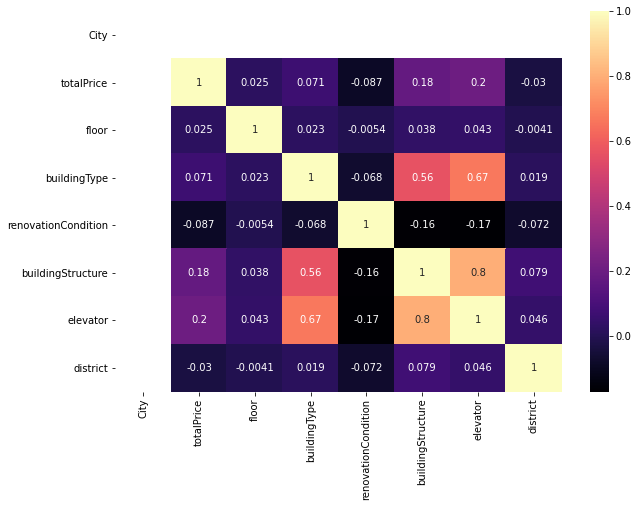

In [9]:
fig,ax = plt.subplots(figsize=(10,7))
sns.heatmap(df.corr(), annot = True, cmap = 'magma',ax=ax)

# plt.savefig('heatmap.png')
plt.show()

In [10]:
corrmat = df.corr()
print(corrmat['totalPrice'].sort_values(ascending=False))

totalPrice             1.000000
elevator               0.204423
buildingStructure      0.179671
buildingType           0.070721
floor                  0.024519
district              -0.030140
renovationCondition   -0.086557
City                        NaN
Name: totalPrice, dtype: float64


## Remove Outliers

In [11]:
# sns.boxplot(df['totalPrice'])

In [12]:
# percentile25 = df['totalPrice'].quantile(0.25)
# percentile75 = df['totalPrice'].quantile(0.75)
# iqr = percentile75 - percentile25

In [13]:
# upper_limit = percentile75 + 1.5 * iqr
# lower_limit = percentile25 - 1.5 * iqr

In [14]:
# Finding Outliers
# df[df['']]

## Calculate Statistics

In [15]:
# Minimum price of the data
minimum_price = np.amin(df['totalPrice'])

# Maximum price of the data
maximum_price = np.amax(df['totalPrice'])

# Mean price of the data
mean_price = np.mean(df['totalPrice'])

# Median price of the data
median_price = np.median(df['totalPrice'])

# Standard deviation of prices of the data
std_price = np.std(df['totalPrice'])

# Show the calculated statistics
print("Statistics for Selling dataset:\n")
print("Minimum price: ￥{}".format(minimum_price)) 
print("Maximum price: ￥{}".format(maximum_price))
print("Mean price: ￥{}".format(mean_price))
print("Median price ￥{}".format(median_price))
print("Standard deviation of prices: ￥{}".format(std_price))

Statistics for Selling dataset:

Minimum price: ￥0.0
Maximum price: ￥49000000.0
Mean price: ￥4089800.3062556484
Median price ￥3530000.0
Standard deviation of prices: ￥2538327.470760205


In [16]:
# cols_to_dummies = ['City','District','Floor','FloorType','BuildingType','BuildingStructure','RenovationCondition','Elevator']
# df = pd.get_dummies(data=df, columns=cols_to_dummies)
# df = df.dropna()
# df.head()

# Machine Learning

## Spliting into training and testing dataset

In [17]:
X = df.drop(['totalPrice'], axis = 1)
y = df['totalPrice']

In [18]:
print(X.shape)
print(y.shape)

(159344, 11)
(159344,)


In [19]:
# split data to 80% of training and 20% of testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=47)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127475, 11)
(31869, 11)
(127475,)
(31869,)


## Standardization

In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
# cols_to_norm = ['Square','ConstructionTime','BedRooms','LivingRooms','Kitchens','BathRooms','Lng','Lat']
# scaler = MinMaxScaler()

# X_train[cols_to_norm] = scaler.fit_transform(X_train[cols_to_norm])
# X_test[cols_to_norm] = scaler.transform(X_test[cols_to_norm])

# X_train.head()

## Multiple Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print(lr_model.score(X_train, y_train))
print(lr_model.score(X_test, y_test))

0.3181930468611499
0.3055597580449577


In [24]:
# prediction
y_pred_lr = lr_model.predict(X_test)

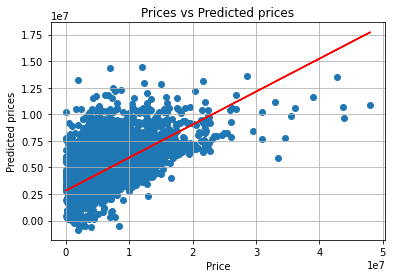

In [25]:
# visualization
y1_test = y_test.values.reshape(-1,1)

lr_model = LinearRegression()
lr_model.fit(y1_test, y_pred_lr)
y1_pred_lr = lr_model.predict(y1_test)

plt.scatter(y1_test, y_pred_lr)
plt.xlabel("Price")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.grid()

plt.plot(y1_test, y1_pred_lr, color='red')
plt.show()

In [26]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
print('r2 socre is ', r2_score(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

r2 socre is  0.3055597580449577
Root Mean Squared Error: 2123396.9870200497


The value of root mean squared error is higher than 10% of the mean value of price (i.e. ￥4799642). This means that our algorithm was not very accurate.

## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test, y_test))

0.6518698979216158
0.5297047946303928


In [28]:
# prediction
y_pred_dt = dt_model.predict(X_test)

In [29]:
from sklearn import metrics
print('r2 socre is ', r2_score(y_test, y_pred_dt))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))

r2 socre is  0.5297047946303928
Root Mean Squared Error: 1747426.9624329973


## Random Forest

In [30]:
# Find optimal n_estimator for the model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid ={
    'n_estimators': [20, 100, 500, 1000, 5000]
}

rf_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

grid_search.best_params_

{'n_estimators': 5000}

In [31]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=47)
rf_model.fit(X_train, y_train)

print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

0.6449887180946983
0.5531171566984467


In [32]:
# prediction
y_pred_rf = rf_model.predict(X_test)

In [33]:
from sklearn import metrics
print('r2 socre is ', r2_score(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

r2 socre is  0.5531171566984467
Root Mean Squared Error: 1703376.2895247524


## SVR

In [34]:
from sklearn.svm import SVR

svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

print(svr_model.score(X_train, y_train))
print(svr_model.score(X_test, y_test))

-0.006336750214381626
-0.006971533361077364


In [35]:
# prediction
y_pred_svr = svr_model.predict(X_test)

In [36]:
from sklearn import metrics
print('r2 socre is ', r2_score(y_test, y_pred_svr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr)))

r2 socre is  -0.006971533361077364
Root Mean Squared Error: 2556950.694435248


## LightGBM Regression

In [37]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

print(lgb_model.score(X_train, y_train))
print(lgb_model.score(X_test, y_test))

0.588528081551406
0.5753140563156077


In [38]:
# prediction
y_pred_lgb = lgb_model.predict(X_test)

In [39]:
from sklearn import metrics
print('r2 socre is ', r2_score(y_test, y_pred_lgb))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lgb)))

r2 socre is  0.5753140563156077
Root Mean Squared Error: 1660533.7247443313


## Lasso

In [40]:
# Find optimal alpha for the model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alphas = np.array([1, 0.5, 0.1, 0.01, 0])

lasso_model = Lasso()
grid_search = GridSearchCV(estimator = lasso_model, param_grid = dict(alpha=alphas))

grid_search.fit(X_train, y_train)

grid_search.best_estimator_.alpha

/Users/xinghuili/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/xinghuili/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/xinghuili/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2399902297534627e+17, tolerance: 65599543633855.57
  model = cd_fast.enet_coordinate_descent(
/Users/xinghuili/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not 

1.0

In [41]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

print(lasso_model.score(X_train, y_train))
print(lasso_model.score(X_test, y_test))

0.318193046859539
0.3055597654464036


In [42]:
# prediction
y_pred_lasso = lasso_model.predict(X_test)

In [43]:
from sklearn import metrics
print('r2 socre is ', r2_score(y_test, y_pred_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))

r2 socre is  0.3055597654464036
Root Mean Squared Error: 2123396.9757043114


## KNN

In [44]:
# Find optimal n_neighbors for the model
from sklearn.neighbors import KNeighborsRegressor

parameter_space = {
    "n_neighbors": [8, 9, 10, 11, 30],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": [1, 2, 20, 50, 200]
}

knn_model = KNeighborsRegressor()

grid_search = GridSearchCV(knn_model, parameter_space, cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=9, weights='distance', algorithm='kd_tree', leaf_size=20)
knn_model.fit(X_train, y_train)

print(knn_model.score(X_train, y_train))
print(knn_model.score(X_test, y_test))

In [ ]:
# prediction
y_pred_knn = knn_model.predict(X_test)

In [ ]:
from sklearn import metrics
print('r2 socre is ', r2_score(y_test, y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

## Compare scores of each model

In [ ]:
for reg in (lr_model, dt_model, rf_model, lgb_model, svr_model, knn_model, lasso_model):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(reg.__class__.__name__, "Mean Squared Error:", mean_squared_error(y_test, y_pred)/100000000)
    print(reg.__class__.__name__, "R2:", r2_score(y_test, y_pred))

## Result for now

We choose LGBMRegressor since it has lowest MSE and highest R2 score, meaning that it has most data being explained by our model.
However, it seems that we still need some improvement to our model because the R2 score is not good enough.
We can drop some features to improve the result, but before dropping features, we need to figure out which feature is important and which one is not.
To do so, we can list the feature importance lists.
We ignore the SVR model because the score is too bad.
We can list their feature importance lists, however, we only have the feature index and we don't have the feature name, we need to add the feature names on our feature importance lists. 


# Improvement on models

In [ ]:
from sklearn.inspection import permutation_importance

# feature importance list
lr_importance = lr_model.coef_
dt_importance = dt_model.feature_importances_
rf_importance = rf_model.feature_importances_
lgb_importance = lgb_model.feature_importances_
knn_results = permutation_importance(knn_model, X_test, y_test, scoring='neg_mean_squared_error')
knn_importance = knn_results.importances_mean

In [ ]:
# first find all names of those features 
feature_names = X.columns
print(feature_names)

In [ ]:
lr_importance_df = pd.DataFrame(lr_importance,index = feature_names)
lr_importance_df.head()

In [ ]:
sel_lr_df = lr_importance_df.loc[lr_importance_df[0] > 0]
sel_lr_df.head()

In [ ]:
dt_importance_df = pd.DataFrame(dt_importance,index = feature_names)
dt_importance_df.head()

In [ ]:
sel_dt_df = dt_importance_df.loc[dt_importance_df[0] > 0]
sel_dt_df.head()

In [ ]:
rf_importance_df = pd.DataFrame(rf_importance,index = feature_names)
rf_importance_df.head()

In [ ]:
sel_rf_df = rf_importance_df.loc[rf_importance_df[0] > 0]
sel_rf_df.head()

In [ ]:
lgb_importance_df = pd.DataFrame(lgb_importance,index = feature_names)
lgb_importance_df.head()

In [ ]:
sel_lgb_df = lgb_importance_df.loc[lgb_importance_df[0] > 0]
sel_lgb_df.head()

In [ ]:
knn_importance_df = pd.DataFrame(knn_importance,index = feature_names)
knn_importance_df.head()

In [ ]:
sel_knn_df = knn_importance_df.loc[knn_importance_df[0] > 0]
sel_knn_df.head()

In [ ]:
# select features which is relatively important in each model 
sel_lr_index = sel_lr_df.index
sel_dt_index = sel_dt_df.index
sel_rf_index = sel_rf_df.index
sel_lgb_index = sel_lgb_df.index
sel_knn_index = sel_knn_df.index

In [ ]:
# Union all important features of these 3 models 
union_1 = np.union1d(sel_lr_index, sel_dt_index)
union_2 = np.union1d(union_1, sel_rf_index)
union_3 = np.union1d(union_2, sel_lgb_index)
union_4 = np.union1d(union_3, sel_knn_index)
union = np.append(union_4,'totalPrice')

In [ ]:
df_important = df[union]
df_important

# Model again

## Split dataset

In [ ]:
# Split dataset
X_imp = df_important.drop(['totalPrice'], axis = 1)
y_imp = df_important['totalPrice']

In [ ]:
print(X_imp.shape)
print(y_imp.shape)

In [ ]:
# split data to 80% of training and 20% of testing
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp, y_imp, test_size=0.2, random_state=47)

In [ ]:
print(X_train_imp.shape)
print(X_test_imp.shape)
print(y_train_imp.shape)
print(y_test_imp.shape)

## Standardize

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_imp = sc.fit_transform(X_train_imp)
X_test_imp = sc.transform(X_test_imp)

## Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_imp, y_train_imp)

print(lr_model.score(X_train_imp, y_train_imp))
print(lr_model.score(X_test_imp, y_test_imp))

In [ ]:
# prediction
y_pred_lr_imp = lr_model.predict(X_test_imp)

print('r2 socre is ', r2_score(y_test_imp, y_pred_lr_imp))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_imp, y_pred_lr_imp)))

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_imp, y_train_imp)

print(dt_model.score(X_train_imp, y_train_imp))
print(dt_model.score(X_test_imp, y_test_imp))

In [ ]:
# prediction
y_pred_dt_imp = dt_model.predict(X_test_imp)

print('r2 socre is ', r2_score(y_test_imp, y_pred_dt_imp))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_imp, y_pred_dt_imp)))

## Random Forest Regression

In [ ]:
# Find optimal n_estimator for the model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid ={
    'n_estimators': [20, 100, 500, 1000, 5000]
}

rf_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

grid_search.best_params_

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=47)
rf_model.fit(X_train, y_train)

print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

In [ ]:
# prediction
y_pred_rf = rf_model.predict(X_test)

print('r2 socre is ', r2_score(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

## LGBM Regression

In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train_imp, y_train_imp)

print(lgb_model.score(X_train_imp, y_train_imp))
print(lgb_model.score(X_test_imp, y_test_imp))

In [ ]:
# prediction
y_pred_lgb_imp = lgb_model.predict(X_test_imp)

print('r2 socre is ', r2_score(y_test_imp, y_pred_lgb_imp))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_imp, y_pred_lgb_imp)))

## KNN Regression

In [ ]:
# Find optimal n_neighbors for the model
from sklearn.neighbors import KNeighborsRegressor

parameter_space = {
    "n_neighbors": [8, 9, 10, 11, 30],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": [1, 2, 20, 50, 200]
}

knn_model = KNeighborsRegressor()

grid_search = GridSearchCV(knn_model, parameter_space, cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=9, weights='distance', algorithm='kd_tree', leaf_size=20)
knn_model.fit(X_train_imp, y_train_imp)

print(knn_model.score(X_train_imp, y_train_imp))
print(knn_model.score(X_test_imp, y_test_imp))

In [ ]:
# prediction
y_pred_knn_imp = knn_model.predict(X_test_imp)

print('r2 socre is ', r2_score(y_test_imp, y_pred_knn_imp))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_imp, y_pred_knn_imp)))

# Using best model (LGBM) to predict selling prices

In [ ]:
df.head()

|  | City | District | Floor | FloorType | BuildingType | BuildingStructure | RenovationCondition | Elevator | Bedrooms | LivingRooms | Kitchen | Bathrooms |
|---|---|---|---|---|---|---|---|---|---|---|---|---|
| 0 | Beijing | 
| 1 | Guangzhou |
| 2 | Shanghai |
| 8 |   | Tianhe |
| 14 |   | Xuhui |
| 19 |   | Tianhe |
| 22 |   | Pudong |
| 31 |   | Xicheng |
| 37 |   | Minhang |


| Feature | Client 1 |
| --- | --- | 
| City | 1 |
| District | 1 |
| Floor | 1 |
| FloorType | 1 |
| BuildingType | 1 |
| BuildingStructure | 1 |
| RenovationCondition | 1 |
| Elevator | 1 |
| Bedrooms | 1 |
| Living Rooms | 1 |
| Kitchen | 1 |
| Bathrooms | 1 |

In [ ]:
# Produce a matrix for client data
client_data = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]] # client 1

# show predictions
price = rf_model.predict(client_data)
print(f"Predicted selling price for Client 1's home: ${price}")

In [ ]:
# # show predictions
# for i, price in enumerate(rf_model.predict(client_data)):
#     print("Predicted selling price for Client {}'s home: ${:,.2f}").format(i+1, price)